# H_choose_learning_machine_models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the file 
data = pd.read_csv('../data/cleaned_data/K3_cleaned_data.csv')
data.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.839182,0.0,1.0,1.0,0.954770,0.700525,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.773486,0.0,0.0,1.0,0.917002,0.570372,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.978813,0.0,1.0,1.0,0.612224,0.630121,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.639247,0.0,0.0,1.0,0.857404,0.663675,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.968192,1.0,0.0,1.0,0.863892,0.454702,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### x/y split

In [3]:
#separate the features from the labels
y = data['stroke']
X = data.drop(['stroke'], axis=1)

In [4]:
y.head(1)

0    1.0
Name: stroke, dtype: float64

In [5]:
# change the type of 'y'
y = y.astype('int64')
y.dtypes

dtype('int64')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
display(y_train.value_counts())
display(y_test.value_counts())

stroke
0    3875
1     201
Name: count, dtype: int64

stroke
0    972
1     48
Name: count, dtype: int64

##### As I mentioned earlier, it is clearly imbalanced and it needs Random oversampling  or SMOTE. 
##### Random oversampling can lead to overfitting, while SMOTE can help to reduce overfitting, as it increases the diversity in the dataset. In this case, SMOTE was chosen.
reference: https://www.quora.com/Whats-the-difference-between-random-oversampling-and-oversampling-using-SMOTE-on-an-imbalanced-dataset-Is-the-later-always-better-then-the-first 

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# Fit and apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [9]:
X_resampled.shape

(7750, 18)

In [10]:
class_counts = y_resampled.value_counts()
print(class_counts)

stroke
0    3875
1    3875
Name: count, dtype: int64


In [11]:
# In order to apply K-NN, the type 'y' are changed into '~Object' 
y_resampled_obj = y_resampled.apply(lambda x: str(x))
y_resampled_obj.dtypes

dtype('O')

In [12]:
# save train and test sets 

X_resampled.to_csv('../data/x_y_data/K3/X_resampled.csv', index=False)
y_resampled.to_csv('../data/x_y_data/K3/y_resampled.csv', index=False)
X_test.to_csv('../data/x_y_data/K3/X_test.csv', index=False)
y_test.to_csv('../data/x_y_data/K3/y_test.csv', index=False)

### Choosing models

In [13]:
X_resampled.shape

(7750, 18)

In [14]:
y_resampled.shape

(7750,)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('GB', GradientBoostingClassifier(random_state = 12345)))
models.append(('AB', AdaBoostClassifier(random_state = 12345)))

In [16]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)


LR: 0.7513548387096773 (0.04970690369268477)
KNN: 0.9024516129032257 (0.07130523855050944)
RF: 0.9486451612903226 (0.027510210005133286)
GB: 0.8649032258064517 (0.05495638228826892)
AB: 0.8113548387096774 (0.07086162153710461)


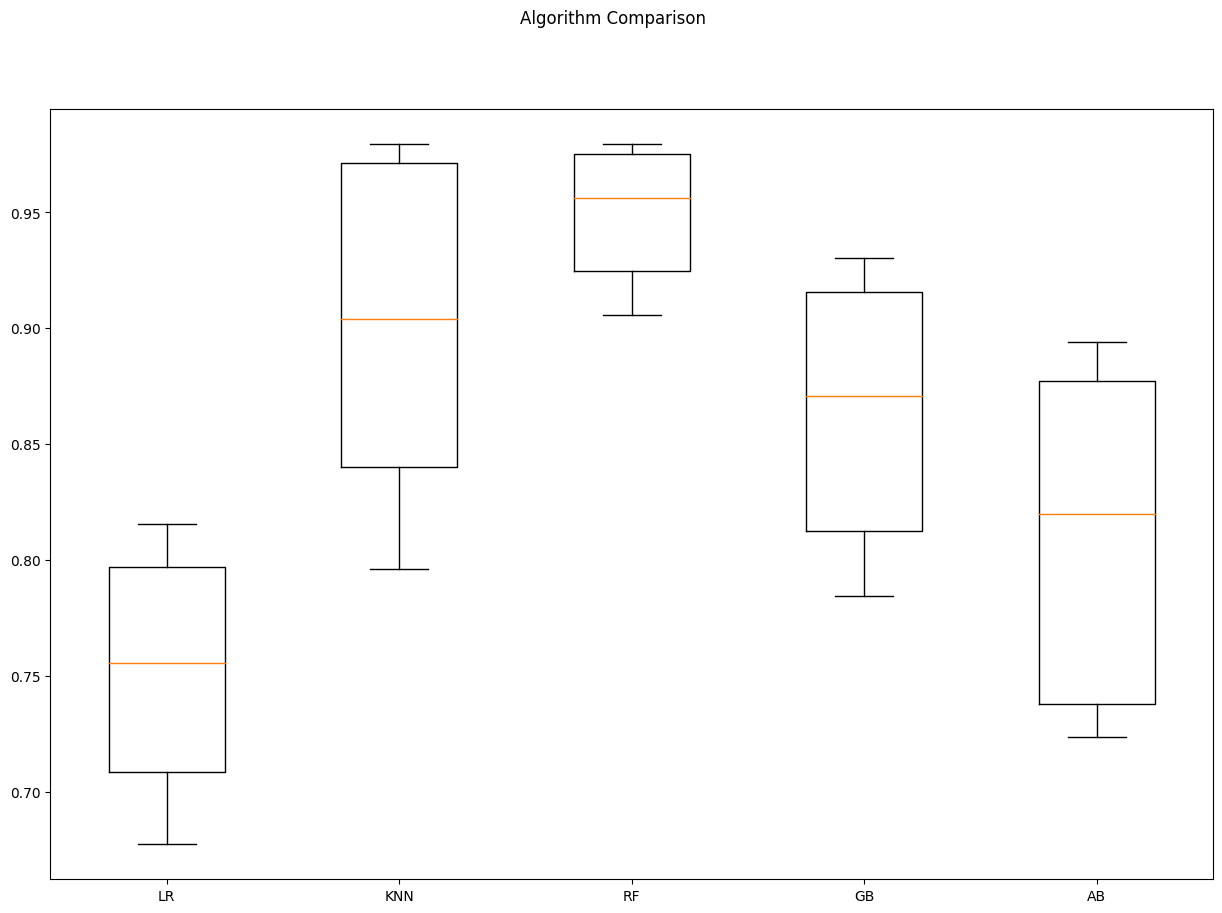

In [17]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####  KNN and Random Forest  are chosen. In addition, nuural network is investigated.

In [18]:
names

['LR', 'KNN', 'RF', 'GB', 'AB']

In [19]:
results

[array([0.6916129 , 0.71612903, 0.70580645, 0.67741935, 0.7316129 ,
        0.80129032, 0.78451613, 0.81032258, 0.77935484, 0.81548387]),
 array([0.83870968, 0.84387097, 0.83741935, 0.79612903, 0.84645161,
        0.96129032, 0.9716129 , 0.97935484, 0.97032258, 0.97935484]),
 array([0.92645161, 0.92387097, 0.91354839, 0.90580645, 0.94580645,
        0.97032258, 0.97935484, 0.97677419, 0.96645161, 0.97806452]),
 array([0.80774194, 0.82709677, 0.80774194, 0.78451613, 0.82967742,
        0.91225806, 0.91612903, 0.91870968, 0.91483871, 0.93032258]),
 array([0.7316129 , 0.75225806, 0.73290323, 0.72387097, 0.76774194,
        0.87225806, 0.87870968, 0.89419355, 0.88774194, 0.87225806])]

In [20]:
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,LR,KNN,RF,GB,AB
0,0.691613,0.838710,0.926452,0.807742,0.731613
1,0.716129,0.843871,0.923871,0.827097,0.752258
2,0.705806,0.837419,0.913548,0.807742,0.732903
3,0.677419,0.796129,0.905806,0.784516,0.723871
4,0.731613,0.846452,0.945806,0.829677,0.767742
5,0.801290,0.961290,0.970323,0.912258,0.872258
6,0.784516,0.971613,0.979355,0.916129,0.878710
7,0.810323,0.979355,0.976774,0.918710,0.894194
8,0.779355,0.970323,0.966452,0.914839,0.887742
9,0.815484,0.979355,0.978065,0.930323,0.872258


In [21]:
score.to_csv('../data/score/K3/scores_5_models.csv', index=False)

#### recall

In [22]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names2 = []
results2 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results2 = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="recall")
    results2.append(cv_results2)
    names2.append(name)
    msg2 = f"{name}: {cv_results2.mean()} ({cv_results2.std()})"
    print(msg2)


LR: 0.824607271406433 (0.028684474103214837)
KNN: 0.9795484981889324 (0.01249710072139747)
RF: 0.9089475971918202 (0.07690509725641292)
GB: 0.7819923958960864 (0.14646346033526236)
AB: 0.8020881728094722 (0.09134024350557454)


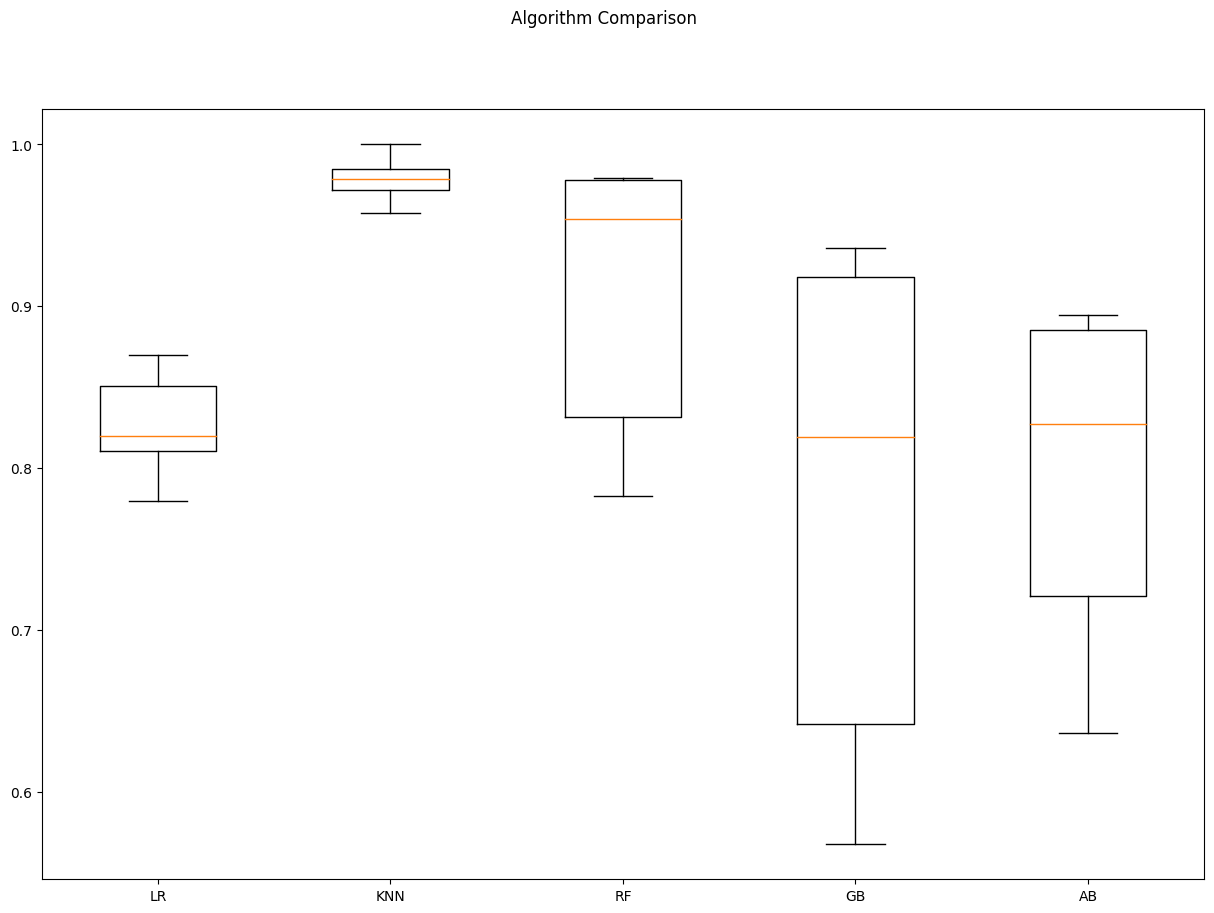

In [23]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [24]:
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,LR,KNN,RF,GB,AB
0,0.848485,1.000000,0.818182,0.606061,0.636364
1,0.869565,0.978261,0.782609,0.630435,0.782609
2,0.851064,0.957447,0.829787,0.723404,0.765957
3,0.810811,0.972973,0.837838,0.567568,0.702703
4,0.852941,1.000000,0.941176,0.676471,0.705882
5,0.823529,0.986159,0.979239,0.935986,0.894464
6,0.784516,0.971613,0.979355,0.916129,0.878710
7,0.810323,0.979355,0.976774,0.918710,0.894194
8,0.779355,0.970323,0.966452,0.914839,0.887742
9,0.815484,0.979355,0.978065,0.930323,0.872258


In [25]:
score2.to_csv('../data/score/K3/scores_5_models_recall.csv', index=False)

### Precision

In [26]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled3 = np.ascontiguousarray(X_resampled)
y_resampled3 = np.ascontiguousarray(y_resampled)

names3 = []
results3 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results3 = cross_val_score(model, X_resampled3, y_resampled3, cv=kfold, scoring="precision")
    results3.append(cv_results3)
    names3.append(name)
    msg3 = f"{name}: {cv_results3.mean()} ({cv_results3.std()})"
    print(msg3)


LR: 0.5554012510354368 (0.4260790796572384)
KNN: 0.6119448779039443 (0.38149322712270695)
RF: 0.6909349291865349 (0.3071626483576144)
GB: 0.5754454706473662 (0.41466601750466286)
AB: 0.5585864211662037 (0.4285408291264093)


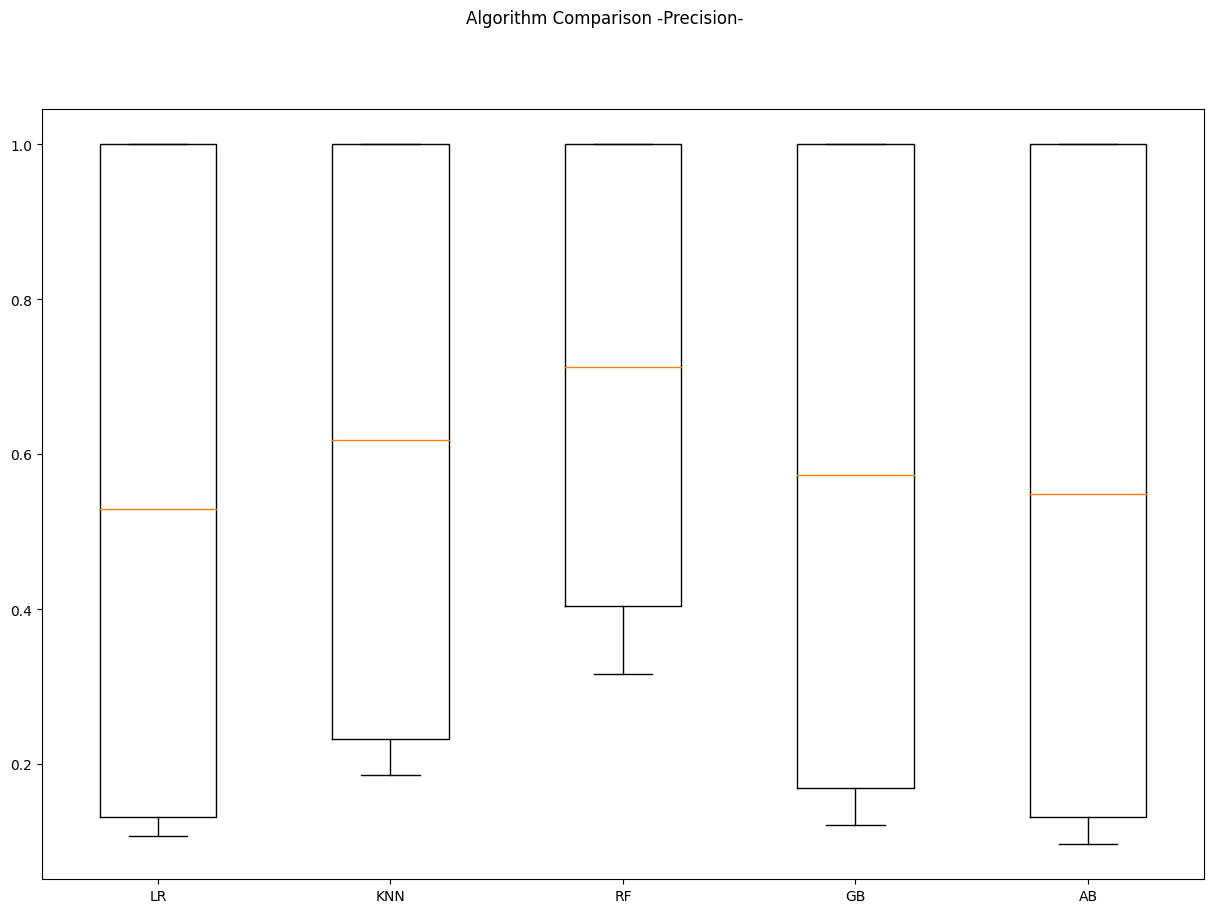

In [27]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -Precision-')
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

In [28]:
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,LR,KNN,RF,GB,AB
0,0.106870,0.208861,0.346154,0.128205,0.096774
1,0.157480,0.272727,0.423529,0.198630,0.165138
2,0.153257,0.266272,0.397959,0.200000,0.155172
3,0.109890,0.186528,0.316327,0.122093,0.113537
4,0.125000,0.222222,0.444444,0.159722,0.123711
5,0.901515,0.962838,0.980936,0.945804,0.931532
6,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
score3.to_csv('../data/score/K3/scores_5_models_precision.csv', index=False)

### f1

In [30]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled4 = np.ascontiguousarray(X_resampled)
y_resampled4 = np.ascontiguousarray(y_resampled)

names4 = []
results4 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results4 = cross_val_score(model, X_resampled4, y_resampled4, cv=kfold, scoring="f1")
    results4.append(cv_results4)
    names4.append(name)
    msg4 = f"{name}: {cv_results4.mean()} ({cv_results4.std()})"
    print(msg4)


LR: 0.5537425374511384 (0.3291125153621047)
KNN: 0.6789474890816527 (0.30738721077103665)
RF: 0.7566825936146744 (0.23204896994473315)
GB: 0.6060632193348987 (0.35029908081284916)
AB: 0.57693137788271 (0.35712310077562237)


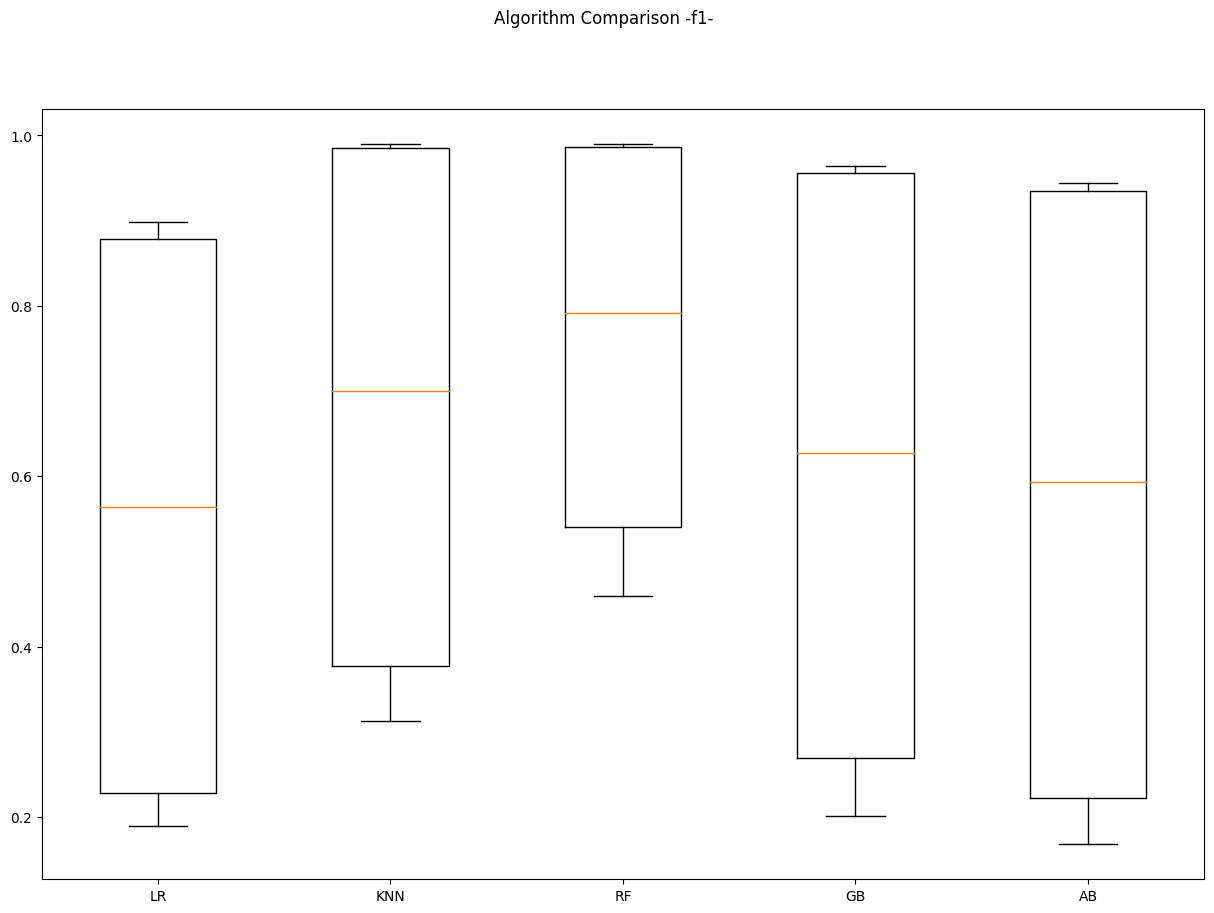

In [31]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -f1-')
ax = fig.add_subplot(111)
plt.boxplot(results4)
ax.set_xticklabels(names4)
plt.show()

In [32]:
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,LR,KNN,RF,GB,AB
0,0.189831,0.345550,0.486486,0.211640,0.168000
1,0.266667,0.426540,0.549618,0.302083,0.272727
2,0.259740,0.416667,0.537931,0.313364,0.258065
3,0.193548,0.313043,0.459259,0.200957,0.195489
4,0.218045,0.363636,0.603774,0.258427,0.210526
5,0.860759,0.974359,0.980087,0.940870,0.912621
6,0.879248,0.985602,0.989570,0.956229,0.935440
7,0.895225,0.989570,0.988251,0.957633,0.944142
8,0.875997,0.984938,0.982940,0.955526,0.940533
9,0.898365,0.989570,0.988911,0.963904,0.931771


In [33]:
score4.to_csv('../data/score/K3/scores_5_models_f1.csv', index=False)